## Top questions that are most predictvie of consumption

In this notebook, we will look at the top questions that are most predictive of consumption. We will use the following approach:
1. Train a Random Forest model on the consumption data
2. Extract the feature importances from the model


In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.inspection import permutation_importance

### Load the Data

In [27]:
# Re-read the data
data = pd.read_csv("../data/raw/survey.csv")

### Preprocess the Data

1. Drop unnecessary columns such as 'unique_id', 'latitude', 'longitude'.
2. Handle missing values. For simplicity, you can drop rows with missing values.
3. Encode categorical variables into numerical values. You can use label encoding for this.

In [28]:
# Drop columns that are not predictive features
data = data.drop(columns=['unique_id', 'latitude', 'longitude'])

# Handle missing values by dropping rows with missing values
data = data.dropna()

# Convert categorical variables into numerical using label encoding
for col in data.columns[data.dtypes == 'object']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

### Prepare the Data for the Model

Separate the predictors (features) and the response variable (target). The predictors are all columns except 'consumption_per_capita', and the response variable is 'consumption_per_capita'.

In [29]:
# Separate the predictors (X) and the response variable (y)
X = data.drop(columns='consumption')
y = data['consumption']

### Train the Random Forest Model

Initialize a Random Forest Regressor with the desired parameters.
Fit the model with the predictors and the response variable.

In [30]:
# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rf.fit(X, y)

RandomForestRegressor(random_state=0)

### Get the Feature Importances

Use the feature_importances_ attribute of the trained model to get the importance of each feature.
Create a DataFrame that contains each feature and its corresponding importance.
Sort the DataFrame by importance in descending order.

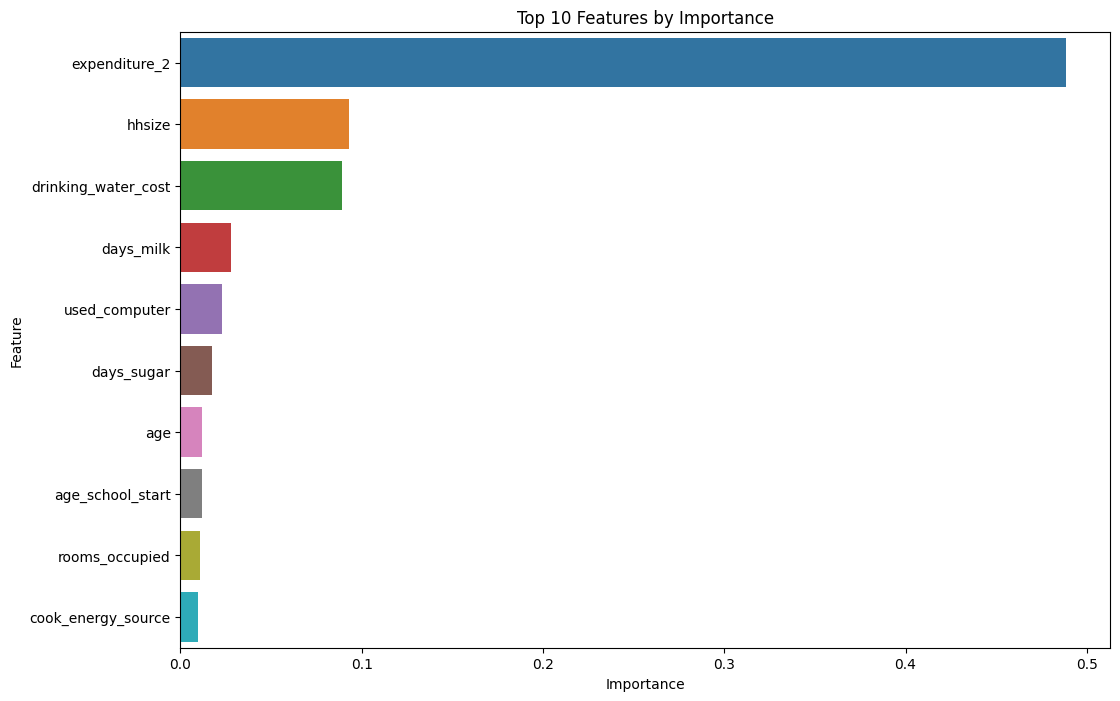

In [31]:
# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame of features and their importances
features_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort by importance and select the top 10
top_10_features = features_importances.sort_values(by='importance', ascending=False).head(10)

# Create a bar plot for feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_10_features.sort_values(by='importance', ascending=False))
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [32]:
# Calculate permutation importance
result = permutation_importance(rf, X, y, n_repeats=10, random_state=42, n_jobs=-1)

# Get importance
importance = result.importances_mean

# Create a DataFrame of features and their importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Display the top 10 features by importance
top_10_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)
print(top_10_features)


                 Feature  Importance
139        expenditure_2    0.591946
4                 hhsize    0.231969
104  drinking_water_cost    0.047575
127            days_milk    0.038234
129           days_sugar    0.024721
29         used_computer    0.018278
12                   age    0.008968
42   breakfast_dependant    0.006835
95        rooms_occupied    0.006827
22      age_school_start    0.006494


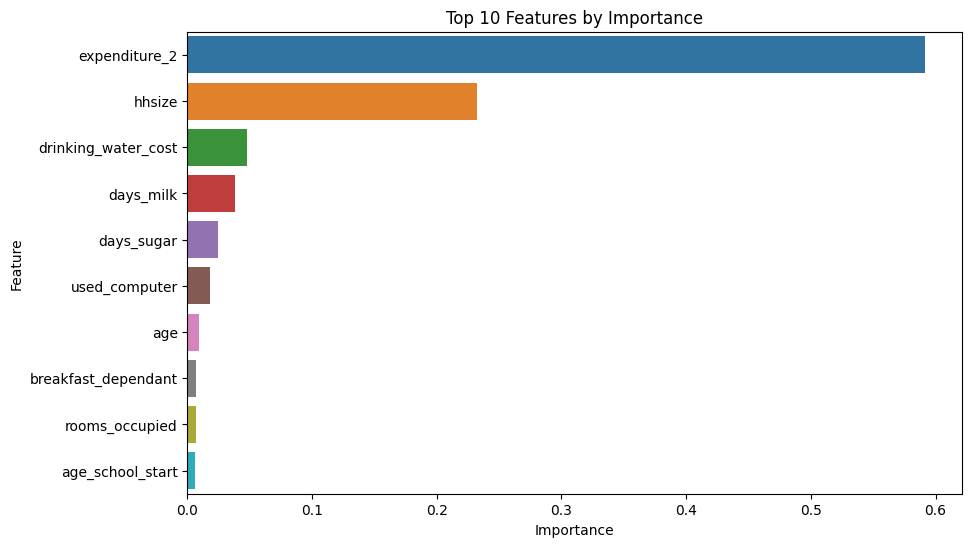

In [33]:
# Create a bar plot for the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features.sort_values(by='Importance', ascending=False))
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()